In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

from scipy.stats import linregress
import seaborn as sns

plt.style.use('fivethirtyeight')
import ipywidgets as widgets
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual

### MRSA Data Cleaning (DONE)

In [2]:
# mrsa_2013_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2013.csv')
# mrsa_2014_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2014.csv')
# mrsa_2015_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2015.csv')

In [3]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2016.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2016_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2016.csv', encoding=result['encoding'])

In [4]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2017.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2017_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2017.csv', encoding=result['encoding'])

In [5]:
# # read in 2016-18 
# import chardet
# import pandas as pd

# with open('mrsa raw data/mrsa-in-hospitals-2018.csv', 'rb') as f:
#     result = chardet.detect(f.read())
    
# mrsa_2018_raw = pd.read_csv('mrsa raw data/mrsa-in-hospitals-2018.csv', encoding=result['encoding'])

In [6]:
# mrsa_2013 = mrsa_2013_raw[['Year ','State','HAI','Facility_Name1',
#                         'FACID1','County','Infection_Count','Patient_Days']].dropna()
# mrsa_2013 = mrsa_2013.rename(columns={'Year ':'Year','Facility_Name1':'Facility1',
#                                       'FACID1':'Facility1_ID','Patient_Days':'Num_patients'})
# mrsa_2013 = mrsa_2013.drop(mrsa_2013.loc[mrsa_2013["County"] == 'Kings-Fresno'].index)

In [7]:
# mrsa_2014 = mrsa_2014_raw[['Year','State','HAI','Facility_Name1','Facility_ID1','County','Cases','Patient_Days',]].dropna()
# mrsa_2014 = mrsa_2014.rename(columns={'Facility_Name1':'Facility1','Facility_ID1':'Facility1_ID','Cases':'Infection_Count',
#                                        'Patient_Days':'Num_patients'})

In [8]:
# mrsa_2015 = mrsa_2015_raw[['Year','State','HAI','Facility_Name1','Facility_ID1','County','Hospital_Onset_Cases',
#                            'Patient_Days']].dropna()
# mrsa_2015 = mrsa_2015.rename(columns={'Facility_Name1':'Facility1','Facility_ID1':'Facility1_ID',
#                                       'Hospital_Onset_Cases':'Infection_Count','Patient_Days':'Num_patients',})

In [9]:
# mrsa_2016 = mrsa_2016_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2016 = mrsa_2016.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [10]:
# mrsa_2017 = mrsa_2017_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2017 = mrsa_2017.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [11]:
# mrsa_2018 = mrsa_2018_raw[['Year','State','HAI','Facility_Name','Facility_ID','County','Infections_Reported',
#                            'Patient_Days']].dropna()
# mrsa_2018 = mrsa_2018.rename(columns={'Facility_Name':'Facility1','Facility_ID':'Facility1_ID',
#                                       'Infections_Reported':'Infection_Count','Patient_Days':'Num_patients'})

In [12]:
# mrsa_2013.to_csv('mrsa cleaned data/mrsa_2013.csv',index=False)
# mrsa_2014.to_csv('mrsa cleaned data/mrsa_2014.csv',index=False)
# mrsa_2015.to_csv('mrsa cleaned data/mrsa_2015.csv',index=False)
# mrsa_2016.to_csv('mrsa cleaned data/mrsa_2016.csv',index=False)
# mrsa_2017.to_csv('mrsa cleaned data/mrsa_2017.csv',index=False)
# mrsa_2018.to_csv('mrsa cleaned data/mrsa_2018.csv',index=False)

In [13]:
# mrsa_merged = pd.concat([mrsa_2013, mrsa_2014, mrsa_2015, mrsa_2016, mrsa_2017, mrsa_2018],ignore_index=True)

# mrsa_merged.to_csv('mrsa cleaned data/mrsa_merged.csv',index=False)

### EDA

In [14]:
#load in mrsa data

mrsa_2013 = pd.read_csv('mrsa cleaned data/mrsa_2013.csv')
mrsa_2014 = pd.read_csv('mrsa cleaned data/mrsa_2014.csv')
mrsa_2015 = pd.read_csv('mrsa cleaned data/mrsa_2015.csv')
mrsa_2016 = pd.read_csv('mrsa cleaned data/mrsa_2016.csv')
mrsa_2017 = pd.read_csv('mrsa cleaned data/mrsa_2017.csv')
mrsa_2018 = pd.read_csv('mrsa cleaned data/mrsa_2018.csv')

mrsa_merged = pd.read_csv('mrsa cleaned data/mrsa_merged.csv')

FileNotFoundError: File b'mrsa cleaned data/mrsa_merged.csv' does not exist

In [ ]:
mrsa_2013.head()

In [ ]:
### Histogram of Infection Counts ###

plt.hist(mrsa_2013['Infection_Count'])

In [ ]:
plt.hist(mrsa_2014['Infection_Count'])

In [ ]:
plt.hist(mrsa_2015['Infection_Count'])

In [ ]:
### Bar plots of County Count ### 

plt.figure(figsize=(20,6))

plt.bar(mrsa_2013['County'].value_counts().index, mrsa_2013['County'].value_counts());

plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2014['County'].value_counts().index, mrsa_2014['County'].value_counts());

plt.xticks(rotation=90);

In [ ]:
plt.figure(figsize=(20,6))

plt.bar(mrsa_2015['County'].value_counts().index, mrsa_2015['County'].value_counts());

plt.xticks(rotation=90);

In [ ]:
# below we tried to plot infection rates in LA county as reported by each unique hospital per data set. 
# However, it seems that not all of the same hospitals were used to record infection count over each year 

# Confusion: What is a useful plot to graph for infection rate by year by county (Sec 5c)
# 

In [ ]:
## Infection Rate by County by Year
plt.figure(figsize=(20,8))
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

hospitals = la_2013['Facility1']
la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']


plt.scatter(hospitals, la_2013['Infection_Count'])
plt.scatter(la_2014['Facility1'], la_2014['Infection_Count'])

plt.xticks(rotation=90);

In [ ]:
la_2013.columns

In [ ]:
len(la_2014['Facility1'].unique()) == len(la_2013['Facility1'].unique())

In [ ]:
a = ['a','b','c']
b = ['b','c','d']

ab = [set(a) & set(b)]
ab

In [ ]:
len(la_2013['Facility1']), len(la_2014['Facility1']), len(la_2015['Facility1']) # not the same hospitals

In [ ]:
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']

#[set(la_2014['Facility_Name1']) & set(la_2015['Facility_Name1'])]

In [ ]:
# infection rates by year
avg_inf_year = [np.mean(mrsa_2013['Infection_Count']),
                np.mean(mrsa_2014['Infection_Count']),
                np.mean(mrsa_2015['Infection_Count']),
                np.mean(mrsa_2016['Infection_Count']),
                np.mean(mrsa_2017['Infection_Count']),
                np.mean(mrsa_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year) #one possible version of 5B 

In [ ]:
plt.scatter(['2013','2014','2015','2016','2017','2018'],avg_inf_year) #another version of 5B 

In [ ]:
merge_1 = pd.merge(mrsa_2013, mrsa_2014, 
         how='outer',on='County').dropna()

In [ ]:
mrsa_2015.head()

In [ ]:
# trying again by county - plot average infection rate per year for each county

la_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Los Angeles']
la_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Los Angeles']
la_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Los Angeles']
la_2016 = mrsa_2016.loc[mrsa_2016['County'] == 'Los Angeles']
la_2017 = mrsa_2017.loc[mrsa_2017['County'] == 'Los Angeles']
la_2018 = mrsa_2018.loc[mrsa_2018['County'] == 'Los Angeles']



avg_inf_year_la = [np.mean(la_2013['Infection_Count']),
                   np.mean(la_2014['Infection_Count']), 
                   np.mean(la_2015['Infection_Count']), 
                   np.mean(la_2016['Infection_Count']),
                   np.mean(la_2017['Infection_Count']), 
                   np.mean(la_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year_la)

In [ ]:
mrsa_merged.loc[mrsa_merged['County'] == 'Kings-Fresno']

In [ ]:
def line_county(County):
    plt.figure(figsize=(10,7));
    x = list(mrsa_merged.loc[mrsa_merged['County']== County].groupby(['Year']).agg(sum).index)
    y = list(mrsa_merged.loc[mrsa_merged['County']== County].groupby(['Year']).agg(sum)['Infection_Count'])
    return sns.scatterplot(x,y)

wid_1 = widgets.Dropdown(
        options = mrsa_merged['County'].unique().tolist(),
        description = 'County',
        disabled = False
)

interact(line_county, County = wid_1)

In [ ]:
# trying again by county - plot average infection rate per year for each county

orange_2013 = mrsa_2013.loc[mrsa_2013['County'] == 'Orange']
orange_2014 = mrsa_2014.loc[mrsa_2014['County'] == 'Orange']
orange_2015 = mrsa_2015.loc[mrsa_2015['County'] == 'Orange']
orange_2016 = mrsa_2016.loc[mrsa_2016['County'] == 'Orange']
orange_2017 = mrsa_2017.loc[mrsa_2017['County'] == 'Orange']
orange_2018 = mrsa_2018.loc[mrsa_2018['County'] == 'Orange']



avg_inf_year_orange = [np.mean(orange_2013['Infection_Count']),
                   np.mean(orange_2014['Infection_Count']), 
                   np.mean(orange_2015['Infection_Count']), 
                   np.mean(orange_2016['Infection_Count']),
                   np.mean(orange_2017['Infection_Count']), 
                   np.mean(orange_2018['Infection_Count'])]

plt.plot(['2013','2014','2015','2016','2017','2018'],avg_inf_year_orange)

In [ ]:
avg_inf_year_orange

In [ ]:
la_2015.head()

### Population Data Cleaning (DONE)

In [19]:
# # population versus infection

#census_raw = pd.read_csv('cc-est2018-alldata-06.csv')
#census = census_raw[['CTYNAME','YEAR','TOT_POP']]

# # @Elias: is it ok to only keep these 3 columns? other columns won't be used necessarily


In [20]:
# # keep only relevant years
# census = census[census['YEAR'].isin([6,7,8,9,10,11])]

# # rename year numbers to actual years
# year_dict = {6:2013,7:2014,8:2015,9:2016,10:2017,11:2018}
# census['YEAR'] = census['YEAR'].replace(year_dict)
# census = census.rename(columns={"CTYNAME":"County", "YEAR":"Year","TOT_POP":"Total_Population"})

# census.to_csv('census_cleaned.csv',index=False)

# Census Bonus

In [31]:
#Code to create/read in Census_bonus

census_raw.head()
census_bonus = census_raw[['CTYNAME', 'YEAR', 'TOT_POP', 'WA_MALE', 'WA_FEMALE',
                          'BA_MALE', 'BA_FEMALE','IA_MALE', 'IA_FEMALE', 'AA_MALE',
                          'AA_FEMALE','NA_MALE','NA_FEMALE','TOM_MALE', 'TOM_FEMALE',
                          'NH_MALE','NH_FEMALE','H_MALE','H_FEMALE']]
census_bonus = census_bonus[census_bonus['YEAR'].isin([6,7,8,9,10,11])]
year_dictionary = {6:2013,7:2014,8:2015,9:2016,10:2017,11:2018}
census_bonus['YEAR'] = census_bonus['YEAR'].replace(year_dictionary)
census_bonus = census_bonus.rename(columns={"CTYNAME":"County", "YEAR":"Year","TOT_POP":"Total_Population",
                                           "WA_MALE":"White Male", "WA_FEMALE":"White Female",
                                           "BA_MALE":"Black Male", "BA_FEMALE":"Black Female",
                                           "IA_MALE":"American Indian Male", "IA_FEMALE":"American Indian Female",
                                           "AA_MALE":"Asian Male","AA_FEMALE":"Asian Female","NA_MALE":"Native Hawaiian Male",
                                           "NA_FEMALE":"Native Hawaiian Female","TOM_MALE":"2+ Race Male","TOM_FEMALE":"2+ Race Female",
                                           "NH_MALE":"Not Hispanic Male","NH_FEMALE":"Not Hispanic Female",
                                           "H_MALE":"Hispanic Male","H_FEMALE":"Hispanic Female"})
census_bonus.to_csv('census_bonus.csv',index=False)


# Pop Data EDA

In [156]:
census = pd.read_csv('census_cleaned.csv')#.drop(['Unnamed: 0'],axis=1)
census.head()

,County,Year,Total_Population
0,Alameda County,2013,1580247
1,Alameda County,2013,97356
2,Alameda County,2013,98218
3,Alameda County,2013,92259
4,Alameda County,2013,95483


In [157]:
pop_by_county = census.groupby(['Year','County']).agg(sum)
pop_by_county.head()

Total_Population
Year County                            
2013 Alameda County             3160494
     Alpine County                 2254
     Amador County                73250
     Butte County                443328
     Calaveras County             89320

In [158]:
pop_by_county = pop_by_county.reset_index()
pop_by_county['County'] = pop_by_county['County'].apply(lambda county_name:re.sub(r' County',"",county_name))
pop_by_county.head()

,Year,County,Total_Population
0,2013,Alameda,3160494
1,2013,Alpine,2254
2,2013,Amador,73250
3,2013,Butte,443328
4,2013,Calaveras,89320


In [159]:
infec_2013 = list(mrsa_2013.groupby(['County']).agg(sum)['Infection_Count'])
infec_2014 = list(mrsa_2014.groupby(['County']).agg(sum)['Infection_Count'])
infec_2015 = list(mrsa_2015.groupby(['County']).agg(sum)['Infection_Count'])
infec_2016 = list(mrsa_2016.groupby(['County']).agg(sum)['Infection_Count'])
infec_2017 = list(mrsa_2017.groupby(['County']).agg(sum)['Infection_Count'])
infec_2018 = list(mrsa_2018.groupby(['County']).agg(sum)['Infection_Count'])

In [160]:
#infec_by_county_2013

In [161]:
## population versus infection rate for each county
    ##  not all years have the same number of counties, so we cannot put all infection counts into one dataframe

infec_by_county_2013 = mrsa_2013.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2014 = mrsa_2014.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2015 = mrsa_2015.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2016 = mrsa_2016.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2017 = mrsa_2017.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()
infec_by_county_2018 = mrsa_2018.groupby(['County']).agg(sum)[['Infection_Count']].reset_index()

In [162]:
merge_2013 = pd.merge(infec_by_county_2013, pop_by_county.loc[pop_by_county['Year'] == 2013], 
         how='left',on='County').dropna()
merge_2014 = pd.merge(infec_by_county_2014, pop_by_county.loc[pop_by_county['Year'] == 2014], 
         how='left',on='County').dropna()
merge_2015 = pd.merge(infec_by_county_2015, pop_by_county.loc[pop_by_county['Year'] == 2015], 
         how='left',on='County').dropna()
merge_2016 = pd.merge(infec_by_county_2016, pop_by_county.loc[pop_by_county['Year'] == 2016], 
         how='left',on='County').dropna()
merge_2017 = pd.merge(infec_by_county_2017, pop_by_county.loc[pop_by_county['Year'] == 2017], 
         how='left',on='County').dropna()
merge_2018 = pd.merge(infec_by_county_2018, pop_by_county.loc[pop_by_county['Year'] == 2018], 
         how='left',on='County').dropna()

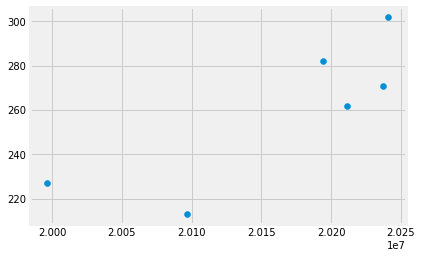

In [163]:
## line plot of total pop vs infection count in la county -- pop v inf in all years
## idea is to produce a similar plot with regression line for every county over all years 
    # (not all years have the same counties)
    

la_inf = list([merge_2013.loc[merge_2013['County']=='Los Angeles']['Infection_Count'].values[0], 
              merge_2014.loc[merge_2014['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2015.loc[merge_2015['County']=='Los Angeles']['Infection_Count'].values[0], 
              merge_2016.loc[merge_2016['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2017.loc[merge_2017['County']=='Los Angeles']['Infection_Count'].values[0],
              merge_2018.loc[merge_2018['County']=='Los Angeles']['Infection_Count'].values[0]])
la_pop = list([merge_2013.loc[merge_2013['County']=='Los Angeles']['Total_Population'].values[0], 
              merge_2014.loc[merge_2014['County']=='Los Angeles']['Total_Population'].values[0],
              merge_2015.loc[merge_2015['County']=='Los Angeles']['Total_Population'].values[0], 
              merge_2016.loc[merge_2016['County']=='Los Angeles']['Total_Population'].values[0],
              merge_2017.loc[merge_2017['County']=='Los Angeles']['Total_Population'].values[0],
              merge_2018.loc[merge_2018['County']=='Los Angeles']['Total_Population'].values[0]])
plt.scatter(la_pop,la_inf)

### Working with mrsa merged

In [164]:
mrsa_merged = pd.read_csv('mrsa cleaned data/mrsa_merged.csv')
mrsa_merged.head(2)

,Year,State,HAI,Facility1,Facility1_ID,County,Infection_Count,Num_patients
0,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"Adventist Medical Center, Reedley",40000124.0,Fresno,0.0,5970.0
1,2013,California,Methicillin-Resistant Staphylococcus aureus Bl...,"AHMC Anaheim Regional Medical Center, Anaheim",60000002.0,Orange,3.0,51929.0


In [188]:
pop_by_county.head()

,Year,County,Total_Population
0,2013,Alameda,3160494
1,2013,Alpine,2254
2,2013,Amador,73250
3,2013,Butte,443328
4,2013,Calaveras,89320


In [199]:
infec_by_county = mrsa_merged.groupby(['Year','County']).agg(sum).reset_index()[['Year','County','Infection_Count']]
infec_by_county.head()

,Year,County,Infection_Count
0,2013,Alameda,18.0
1,2013,Alameda-Contra Costa,2.0
2,2013,Amador,0.0
3,2013,Butte,5.0
4,2013,Calaveras,0.0


In [214]:
# infec_pop_merge = pd.merge(infec_by_county, pop_by_county, how='inner',on=['Year','County']).dropna()
# infec_pop_merge.to_csv('infec_pop_merge.csv',index=False)

In [215]:
infec_pop_merge = pd.read_csv('infec_pop_merge.csv')

In [216]:
infec_pop_merge.loc[infec_pop_merge['County']=='Orange']

,Year,County,Infection_Count,Total_Population
28,2013,Orange,43.0,6216018
83,2014,Orange,39.0,6260644
138,2015,Orange,42.0,6307924
193,2016,Orange,51.0,6341414
248,2017,Orange,75.0,6359900
303,2018,Orange,58.0,6371936


In [217]:
def pop_v_infec(county):
    plt.figure(figsize=(10,5))
    
    x = infec_pop_merge.loc[infec_pop_merge['County'] == county]['Total_Population'].tolist()
    y = infec_pop_merge.loc[infec_pop_merge['County'] == county]['Infection_Count'].tolist()
    
    return sns.scatterplot(x,y)

wid_2 = widgets.Dropdown(
        options = infec_pop_merge['County'].unique().tolist(),
        description = 'County',
        disabled = False
)

interact(pop_v_infec, county = wid_2)


interactive(children=(Dropdown(description='County', options=('Alameda', 'Amador', 'Butte', 'Calaveras', 'Colu…

<function __main__.pop_v_infec(county)>

[None]

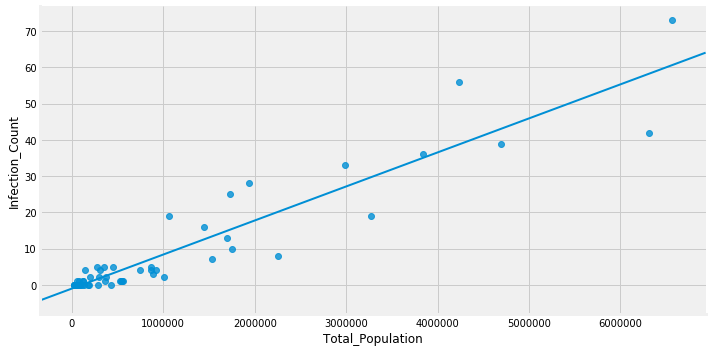

In [249]:
df = infec_pop_merge.loc[infec_pop_merge['Year'] == 2015]
df = df.drop(df['Total_Population'].idxmax())

p = sns.lmplot(x='Total_Population',y='Infection_Count',data=df,ci=None,aspect=2)
plt.setp(p.ax.lines,linewidth=2);

In [225]:
# scatter plot widget - population versus infection rate by year
def pop_v_infec_by_year(year):    
    
    df = infec_pop_merge.loc[infec_pop_merge['Year'] == year]  
    p = sns.lmplot(x='Total_Population',y='Infection_Count',data=df,ci=None,aspect=2)
    plt.title('Population Versus Infection Rate Across Counties Over the Year')
    plt.xlabel("Total Population")
    plt.ylabel("Infection Rate ")
    plt.setp(p.ax.lines,linewidth=2)
    return 

wid_3 = widgets.Dropdown(
        options = infec_pop_merge['Year'].unique().tolist(),
        description = 'Year',
        disabled = False
)

interact(pop_v_infec_by_year, year = wid_3);

interactive(children=(Dropdown(description='Year', options=(2013, 2014, 2015, 2016, 2017, 2018), value=2013), …